To get started, we can perform linear regression using linear algebra. Assume a model of $y=\theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n$, where $n$ is the number of features. $\theta_0$ is the bias term. The typical performance metric is mean square error (MSE): $E( \Theta )=\frac{1}{m}\sum_{i=1}^m (\Theta^T x^{(i)}-y^{(i)})$, where $\Theta = [\theta_0 \ \cdots \ \theta_n]$.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X = 1.6 * np.random.rand(500,1)
y = 1.5 + 2.25 * X + np.random.randn(500,1) # theta_0 = 1.5, theta_1 = 2.25

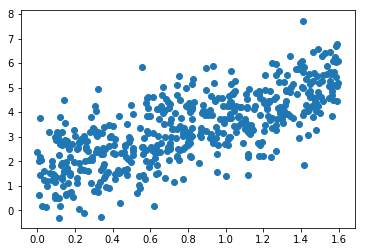

In [13]:
%matplotlib inline
plt.scatter(X,y)
plt.show()

By taking all data instances, $x^{(i)}$, and their target values, $y^{(i)}$, we can compute the parameters using the closed form equation:
$\hat{\Theta}=(X^T\cdot X)^{-1}\cdot X^T\cdot y$

In [14]:
X_b = np.c_[np.ones((500,1)), X] # Adds the bias term, x_0 = 1

In [15]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [16]:
# We get something pretty close to the function that generated this data.
theta

array([[1.51509982],
       [2.28435691]])

In [17]:
# Test the predictions
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [18]:
y_predict = X_new_b.dot(theta)
y_predict

array([[1.51509982],
       [6.08381364]])

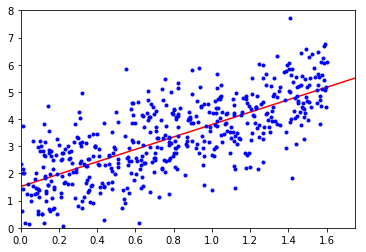

In [19]:
# Plot it
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,1.75,0,8])
plt.show()

In [20]:
# We can do the same with sklearn linear regression.
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print("Model: " + str(linreg.coef_) + "x + " + str(linreg.intercept_))

Model: [[2.28435691]]x + [1.51509982]


In [22]:
linreg.predict(X_new)

array([[1.51509982],
       [6.08381364]])

For data sets with a *large number of *features*, the inversion required to solve the equation becomes very expensive. Instead, *gradient descent* can be applied to adjust parameters, $\Theta$. In linear regression, MSE is the typical cost function. We compute the gradient of MSE along each parameter $\theta_j$. Gradient descent searches through the parameter space following the gradient of a convex function.

In [38]:
# Implementation of gradient descent
def gradient_descent(X, y, n_params, eta, tolerance):
    m = len(X)

    # Initialize the parameters to some random value
    theta = np.random.randn(n_params,1)
    # Compute an initial gradient vector
    gradient_vector = 2/m * X.T.dot(X.dot(theta) - y)
    
    while np.linalg.norm(gradient_vector) > tolerance:
        # Compute the gradient
        gradient_vector = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - eta * gradient_vector

    return theta

In [44]:
params = gradient_descent(X_b, y, 2, 0.1, 0.001)
print("Final parameters: " + str(params))

Final parameters: [[1.51766441]
 [2.28152682]]


Nice!